In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train[0][1].shape

(32, 3)

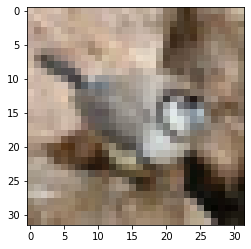

In [6]:
plt.imshow(x_train[90])

In [7]:
y_train[90]

array([2], dtype=uint8)

In [12]:
def sample_images(x):
    plt.figure(figsize = (20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

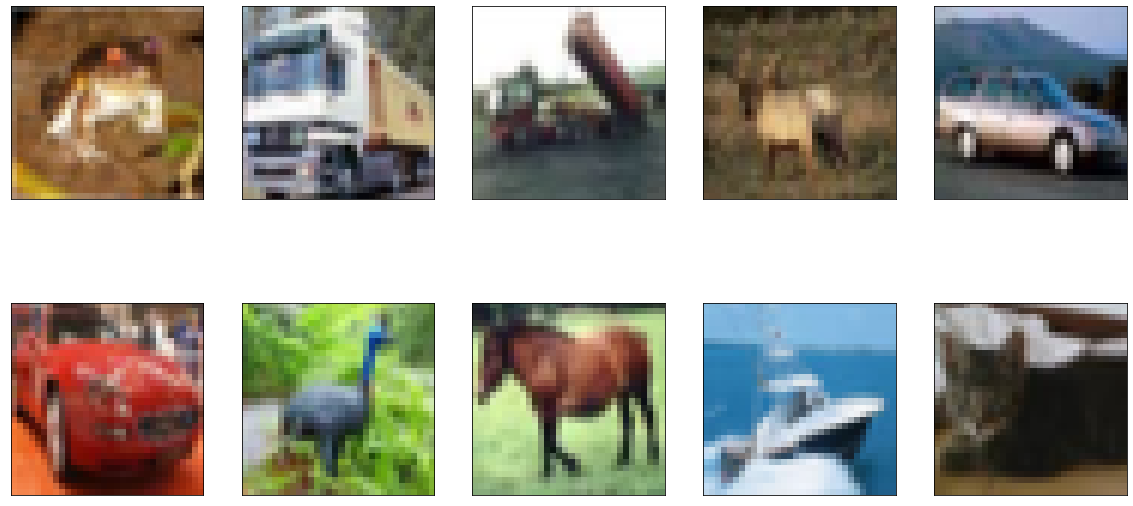

In [13]:
sample_images(x_train)

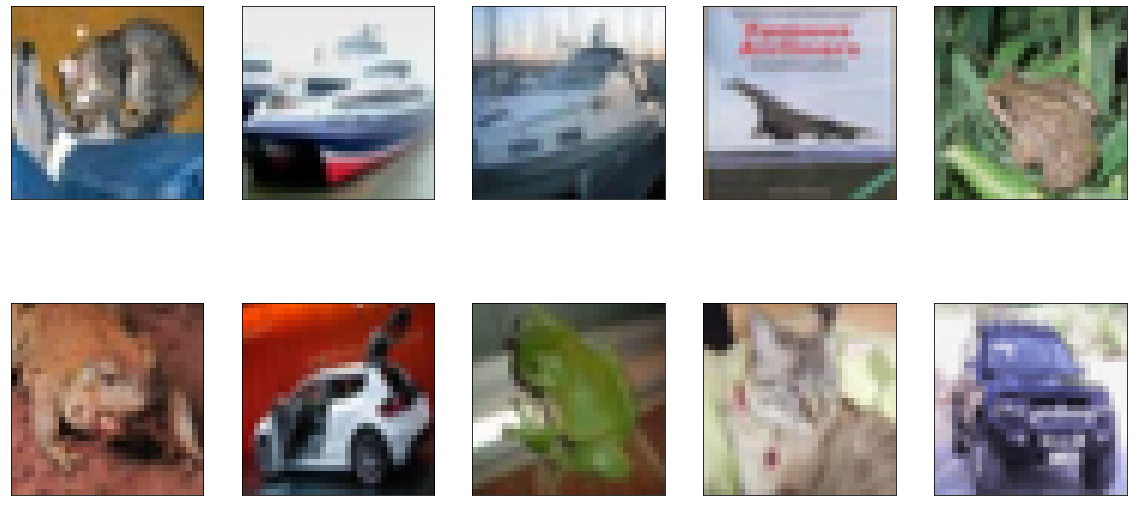

In [14]:
sample_images(x_test)

In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv(model,num_filters):
        model.add(Conv2D(num_filters,(3,3),activation = "relu"))
        model.add(MaxPooling2D(2,2))
        return model
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32,32,3)))
    model = add_conv(model,128)
    model = add_conv(model,64)
    model = add_conv(model,32)
    model.add(Flatten())
    model.add(Dense(units = 512,activation = "relu"))
    model.add(Dense(units = 10,activation = "softmax"))
    model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
    return model

In [23]:
model1 = create_model()

In [24]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [25]:
x_train = x_train/255.
x_test = x_test/255.

In [27]:
history = model1.fit(x_train,y_train, epochs=10, 
                    validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.1975 - accuracy: 0.5736 - val_loss: 1.1958 - val_accuracy: 0.5750
Epoch 2/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.0685 - accuracy: 0.6189 - val_loss: 1.0631 - val_accuracy: 0.6256
Epoch 3/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.9785 - accuracy: 0.6506 - val_loss: 1.0253 - val_accuracy: 0.6416
Epoch 4/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.9156 - accuracy: 0.6746 - val_loss: 1.0328 - val_accuracy: 0.6368
Epoch 5/10
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.8620 - accuracy: 0.6953 - val_loss: 1.0023 - val_accuracy: 0.6489
Epoch 6/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.8159 - accuracy: 0.7116 - val_loss: 0.9311 - val_accuracy: 0.6762
Epoch 7/10
50000/50000 [==============================] 

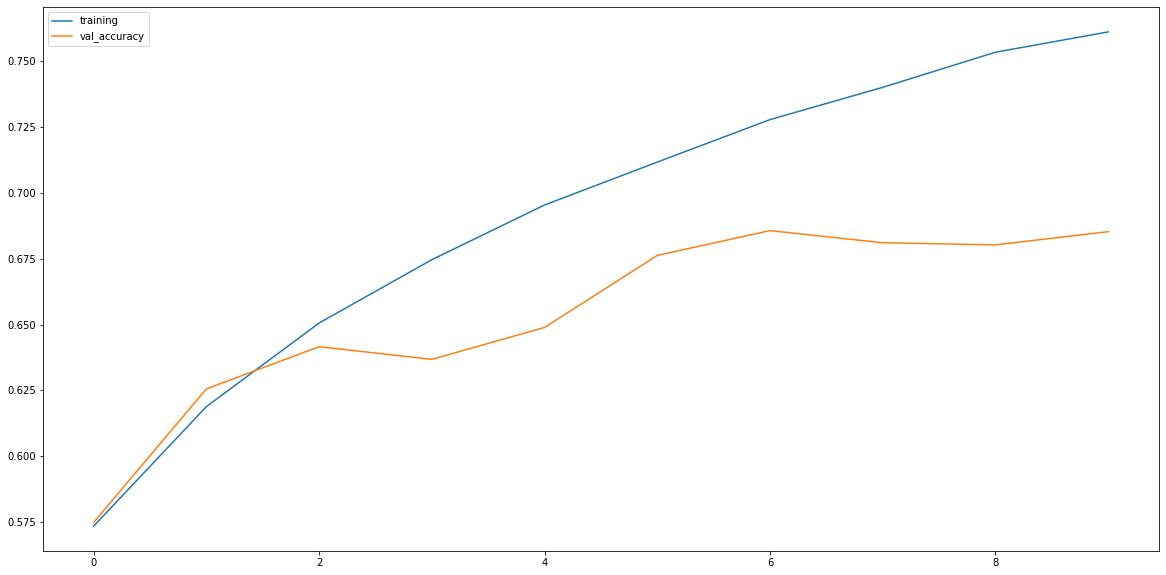

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(history.history["accuracy"],label = "training");
plt.plot(history.history['val_accuracy'], label = 'val_accuracy');
plt.legend();